In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [148]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
q = 0
p = 1
par = x,y,p,q
k = 0.01
gamma = 0.1
mu = 0.1
beta = 0.2
alpha = 0.2
count = 6
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

# Van der Pol

<p>Calculating Period, Frequency, angular frequency and Amplitude for a changing alpha value (0-5)
because the Van der Pol Oscillator doesnt change its Oscillation behavior, the Period, Frequency,.. ect can be be calculate with more accuracy (more timesteps)</p>

if mu = 0.01, the period is 2π

for the Simulation, we gonna use mu = 2, to have this rectangular limit cycle

In [149]:
# vdp specific values
t_step_vdp = 0.01
t_last_vdp = 1000 # 1 point represent 1mHz
t_vdp = np.arange(0, 5000, t_step_vdp)
keep_vdp = int(t_last_vdp / t_step_vdp)
x_vdp = 0.5
y_vdp = 0.5
q_vdp = 0.5
p_vdp = 0.5
par_vdp = x,y,p,q
count_vdp = 10
vdp = OnesidedCoupling(par_vdp, t_vdp, t_vdp, k, mu, gamma, alpha, beta)

In [150]:
period_vdp = lilie.period(count_vdp)[1]
f_vdp = 1/period_vdp
w_vdp = 2 * np.pi * f_vdp
amp_vdp = np.mean(lilie.find_peaks_max()[1][1]['peak_heights'])
time_amp_vdp = [t_vdp[i] for i in lilie.find_peaks_max()[1][0]]

print(period_vdp)
print(f_vdp)
print(w_vdp)
print(amp_vdp)
print(time_amp_vdp)


6.286999999999989
0.15905837442341367
0.9993932411610621
0.024858520449956487
[np.float64(1.75), np.float64(8.03), np.float64(14.32), np.float64(20.61), np.float64(26.900000000000002), np.float64(33.18), np.float64(39.47), np.float64(45.76), np.float64(52.04), np.float64(58.33), np.float64(64.62), np.float64(70.91), np.float64(77.19), np.float64(83.48), np.float64(89.77), np.float64(96.05)]


## Solutions

In [151]:
xsol = lilie.x_solv()[-keep:]
ysol = lilie.y_solv()[-keep:]
psol = lilie.p_solv()[-keep:]
qsol = lilie.q_solv()[-keep:]


## Find Peaks

In [152]:
xmax = lilie.maximumofplot()[0]
ymax = lilie.maximumofplot()[1]
x_amplitude = lilie.find_peaks_max()[0]
y_amplitude = lilie.find_peaks_max()[1]

# Timeseries
showing the timeseries for Van der Pol Oscillator and Duffing oscillator with the Maximum peak of the Plot.

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.20, $\mu$ = 0.10, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


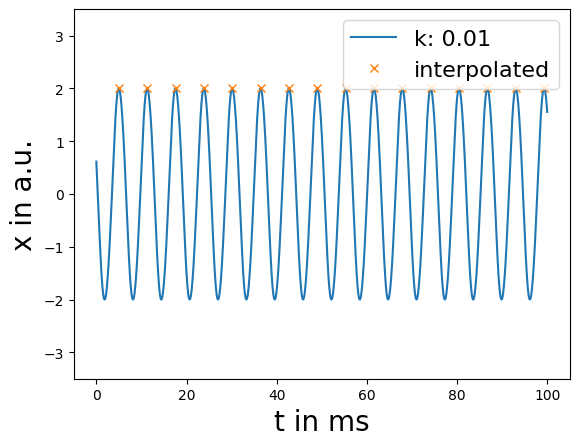

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.20, $\mu$ = 0.10, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


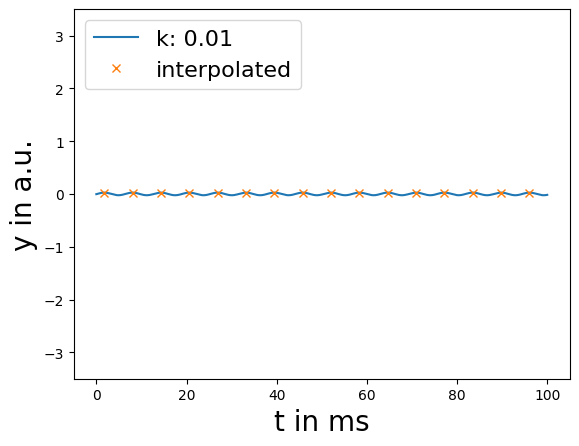

In [153]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "interpolated")
# plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "max peak")

plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

## Quadratic Interpolation

In [154]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:253: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


In [155]:
xing, x_amplitude[1]['peak_heights']

([np.float64(-1.3006371810235233),
  np.float64(-1.543705235335274),
  np.float64(-1.7467235143856215),
  np.float64(-1.8905691455131546),
  np.float64(-1.987305469745138),
  np.float64(-2.0460623234815785),
  np.float64(-2.0752414087105535),
  np.float64(-2.094775382645821),
  np.float64(-2.1061054894412337),
  np.float64(-2.1129195283601803),
  np.float64(-2.1120989889686825),
  np.float64(-2.1151024917726318),
  np.float64(-2.117433810219154),
  np.float64(-2.1499281505621184),
  np.float64(-2.089107409952703),
  np.float64(-5.0332540563231305)],
 array([2.0001021 , 2.00010197, 2.00008517, 2.00009652, 2.0001041 ,
        2.000095  , 2.00008737, 2.00010267, 2.00010127, 2.00008322,
        2.00009767, 2.00010399, 2.00009364, 2.00008912, 2.00010314,
        2.0001005 ]))

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.20, $\mu$ = 0.10, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


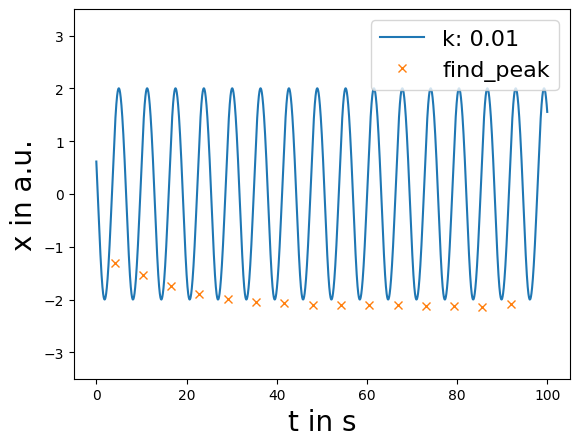

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.20, $\mu$ = 0.10, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 1.00, q$_0$ = 0.00


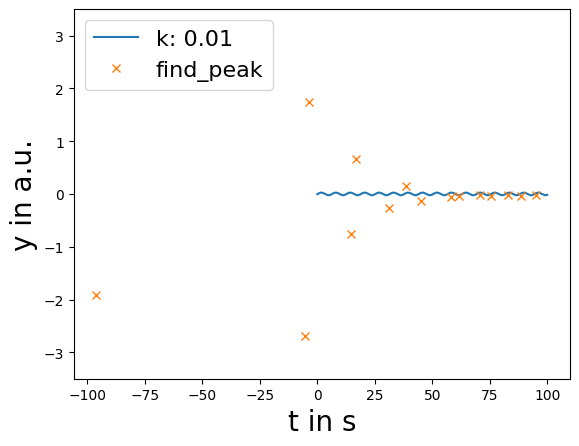

In [156]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot(tx_plus, xing, "x", label = "find_peak")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in s", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot(ty_plus, ying, "x", label = "find_peak")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in s", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Phasetime

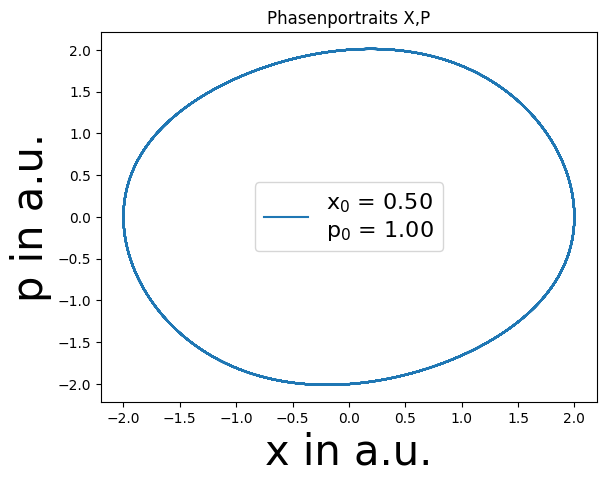

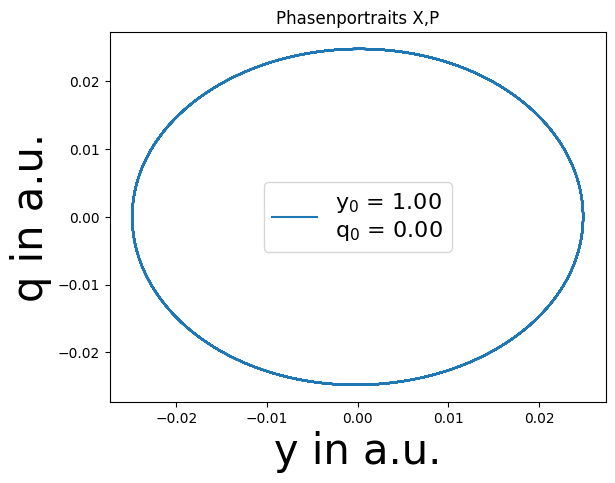

In [157]:

label = f"x$_0$ = {par[0]:.2f} \np$_0$ = {par[2]:.2f}"
plt.plot(xsol[-keep:],psol[-keep:],label = label)
plt.xlabel("x in a.u.",fontsize = 30)
plt.ylabel("p in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

label = f"y$_0$ = {par[1]:.2f} \nq$_0$ = {par[3]:.2f}"
plt.plot(ysol[-keep:],qsol[-keep:],label = label)
plt.xlabel("y in a.u.",fontsize = 30)
plt.ylabel("q in a.u.",fontsize = 30)
# title = "$\gamma$ = " + f"{gamma:.2f} $\mu$ = " + f"{mu:.2f} ß =" + f"{beta:.2f} alpha = " + f"{alpha:.2f} k = " + f"{k:.2f}"
plt.legend(fontsize = 16)
plt.title("Phasenportraits X,P")
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 20)
plt.show()

# Resonance Curve

In [158]:
r_alpha = 0.64
print(np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).period(10)))
print(1/np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).period(10)))
print(2 * np.pi * 1/np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).period(10)))
print(np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, r_alpha, beta).find_peaks_max()[1][1]['peak_heights']))

6.286999999999989
0.15905837442341367
0.999393241161062
0.05378952792774807


In [185]:
reso_alpha = np.arange(0.2, 4, 0.02)
omega = [np.sqrt(i) for i in reso_alpha]
revers_omega = [i for i in reversed(omega)]

In [160]:
amp.index(max(amp))
reso_alpha[22]

np.float64(0.6399999999999998)

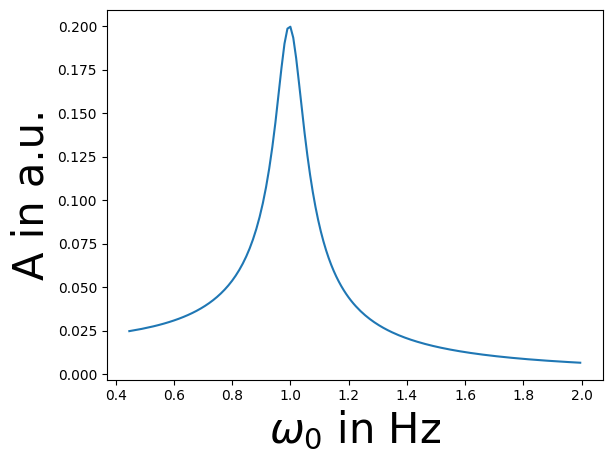

In [161]:
# findpeaks
amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reso_alpha]

time_amp = [t[k] for k in [OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][0][-10:] for i in reso_alpha]]

# reverse_amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights'][-6:]) for i in reversed(reso_alpha)]
plt.plot(omega, amp)
# plt.plot(revers_omega, reverse_amp)
plt.xlabel("$\omega _0$ in Hz", fontsize = 30)
plt.ylabel("A in a.u.",fontsize = 30)
plt.show()

# Phase difference

/var/folders/2q/qj12d6zd1qg4x5blqbp5z8fc0000gn/T/ipykernel_75278/2207337207.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 16, loc = "upper right")


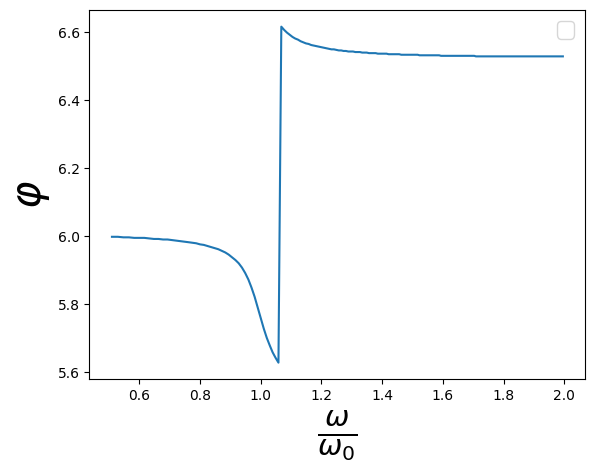

In [187]:
phaseamp = [np.diff([time_amp_vdp[0],i[0]], axis = 0)/period_vdp for i in time_amp]

plt.plot(omega[3:], phaseamp[3:])
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\\frac{\omega}{\omega _0}$", fontsize = 30)
plt.ylabel("$\\varphi$",fontsize = 30)
plt.show()

# Randomstuff

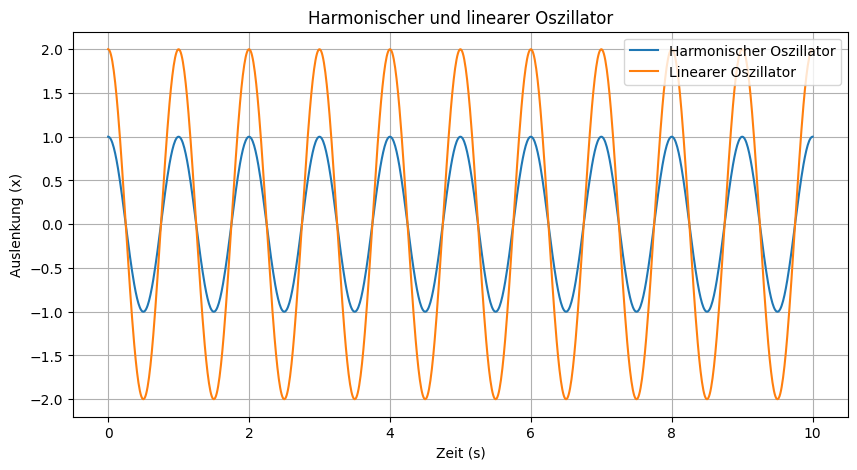

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
